# Research for the telecom operator Megaline
This is project for the telecom operator Megaline. I need to search which of the plans is more profitable in order to adjust the advertising budget. I'll have the data on 500 Megaline client. I'll be analyze clients' behavior and determine which prepaid plan is more profitable. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information.-1">Step 1. Open the data file and study the general information.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-1" data-toc-modified-id="Conclusion-step-1-1.1">Conclusion step 1</a></span></li></ul></li><li><span><a href="#Step-2.-Prepare-the-data" data-toc-modified-id="Step-2.-Prepare-the-data-2">Step 2. Prepare the data</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-2" data-toc-modified-id="Conclusion-step-2-2.1">Conclusion step 2</a></span></li></ul></li><li><span><a href="#Step-3.-Analyze-the-data" data-toc-modified-id="Step-3.-Analyze-the-data-3">Step 3. Analyze the data</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-3" data-toc-modified-id="Conclusion-step-3-3.1">Conclusion step 3</a></span></li></ul></li><li><span><a href="#Step-4.-Test-the-hypotheses" data-toc-modified-id="Step-4.-Test-the-hypotheses-4">Step 4. Test the hypotheses</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-4" data-toc-modified-id="Conclusion-step-4-4.1">Conclusion step 4</a></span></li></ul></li><li><span><a href="#Step-5.-Overall-conclusion" data-toc-modified-id="Step-5.-Overall-conclusion-5">Step 5. Overall conclusion</a></span></li></ul></div>

## Step 1. Open the data file and study the general information. 

In [128]:
import pandas as pd
from math import ceil
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
sns.set_theme(style="whitegrid", palette='Set2')

In [20]:
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
user = pd.read_csv('megaline_users.csv')

In [21]:
calls.head()
internet.head()
messages.head()
plans.head()
user.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [22]:
calls.info()
internet.info()
messages.info()
plans.info()
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

### Conclusion step 1
in first look all is good. I dont see something bad in data. Merging it in one DF and will look aain.

## Step 2. Prepare the data

In [23]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
# made new column with num of mounth when was call
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
# made new column with num of mounth when was internet session
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
# made new column with name of mounth when was send sms
calls['duration'] = calls['duration'].apply(ceil)
# call is rounded to one minute

In [24]:
calls_grouped_sum = calls.groupby(['user_id', 'month'], as_index=False).sum()
calls_grouped_count = calls.groupby(
    ['user_id', 'month'], as_index=False)['id'].count()
calls_grouped_count = calls_grouped_count.rename(columns={"id": "c_count"})
internet_grouped = internet.groupby(['user_id', 'month'], as_index=False).sum()
messages_grouped = messages.groupby(['user_id', 'month'], as_index=False)[
    'message_date'].count()
messages_grouped = messages_grouped.rename(columns={"message_date": "m_count"})
# grouped with sum or count for each user for month
calls_grouped_sum
calls_grouped_count
internet_grouped
messages_grouped

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


,user_id,month,c_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


,user_id,month,m_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
data_frames = [calls_grouped_sum, calls_grouped_count,
               internet_grouped, messages_grouped]
df = reduce(lambda left, right: pd.merge(left, right, on=[
            'user_id', 'month'], how='outer'), data_frames)
df = pd.merge(left=df, right=user, how='outer', on=['user_id'])
# merged in one DF all data withoun description of plans.

In [26]:
len(df.loc[df['month'].isnull()]['user_id'].unique())
df.dropna(subset=['month'], inplace=True)

10

2% of users dont have any information of duraction, messeges or internet. I droped it.

In [27]:
len(df.loc[df['duration'].isnull()]['user_id'].unique())
df['duration'].fillna(0, inplace=True)
df['c_count'].fillna(0, inplace=True)

14

2.8% of users dont have any information of duraction or messeges. I changed NaN to 0 like they used 0 minuts.

In [28]:
len(df.loc[df['mb_used'].isnull()]['user_id'].unique())
df['mb_used'].fillna(0, inplace=True)

8

1.4% of users dont have information of internet session. I changed NaN to 0 like they not used internet.

In [29]:
len(df.loc[df['m_count'].isnull()]['user_id'].unique())
df['m_count'].fillna(0, inplace=True)

105

21% of users dont have information of messeges. I think in 2018 peaple dont use sms like in 2008. I changed NaN to 0 like tham send 0 sms.

In [30]:
df[['month', 'm_count', 'c_count', 'duration']] = df[[
    'month', 'm_count', 'c_count', 'duration']].astype('int64')
# changed types of some colums to int
df.dtypes

user_id         int64
month           int64
duration        int64
c_count         int64
mb_used       float64
m_count         int64
first_name     object
last_name      object
age             int64
city           object
reg_date       object
plan           object
churn_date     object
dtype: object

In [31]:
def money_count(data):
    """
    Function counts how much money users spent in month.
    """
    cost = 0
    calls_count = ceil(data['duration']) - data['minutes_included']
    internet_count = data['mb_used'] - data['mb_per_month_included']
    sms_count = data['m_count'] - data['messages_included']
    if calls_count > 0:
        cost = calls_count * data['usd_per_minute']
    if internet_count > 0:
        cost += ceil(internet_count / 1024) * data['usd_per_gb']
    if sms_count > 0:
        cost += sms_count * data['usd_per_message']
    return cost + data['usd_monthly_pay']


df_for_count = pd.merge(left=df, right=plans,
                        left_on='plan', right_on='plan_name', how='left')

In [33]:
df['monthly_pay'] = df_for_count.apply(money_count, axis=1)
df

,user_id,month,duration,c_count,mb_used,m_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_pay
0,1000,12,124,16,1901.47,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8,182,27,6919.15,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
2,1001,9,315,49,13314.82,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
3,1001,10,393,65,22330.49,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,90.09
4,1001,11,426,64,18504.30,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0,0,21346.95,42,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,70.00
2289,1204,12,0,0,36730.05,78,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,112.00
2290,1349,10,0,0,13093.55,76,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,20.78
2291,1349,11,0,0,17128.26,72,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,40.66


### Conclusion step 2
I counted spent time, mb of internet and sms per month for each users. Made one data frame and count how much money they spent. Droped user without some information. DF ready for exploring.
## Step 3. Analyze the data

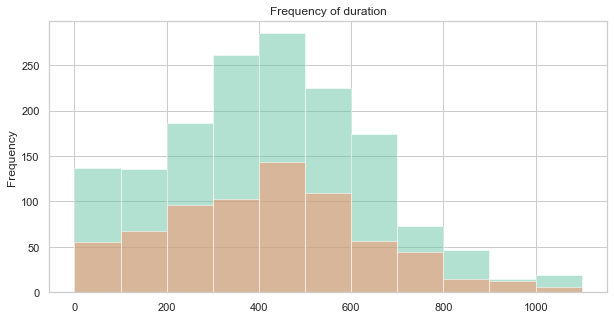

In [65]:
plt.figure(figsize=(10, 5))
df.groupby(by='plan')['duration'].plot(kind='hist',
                                       grid=True,
                                       range=(0, 1100),
                                       bins=11,
                                       alpha=0.5,
                                       title='Frequency of duration');

in duration we have a little right-skewed distribution. mostly users spend from 200 to 700 minuts.

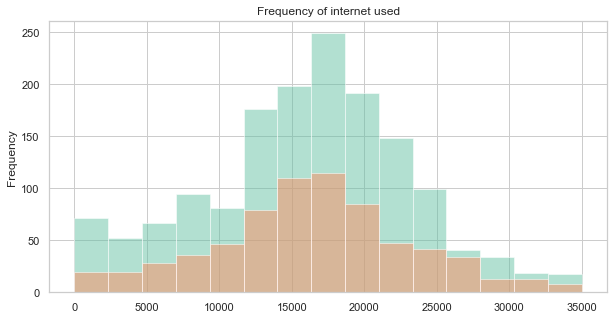

In [67]:
plt.figure(figsize=(10, 5))
df.groupby(by='plan')['mb_used'].plot(kind='hist',
                                      grid=True,
                                      range=(0, 35000),
                                      bins=15,
                                      alpha=0.5,
                                      title='Frequency of internet used');

in internet used normal distribution histogram. mostly users spend from 6 to 25 GB

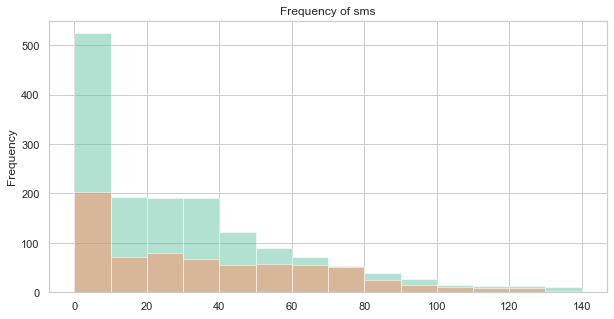

In [69]:
plt.figure(figsize=(10, 5))
df.groupby(by='plan')['m_count'].plot(kind='hist',
                                      grid=True,
                                      range=(0, 140),
                                      bins=14,
                                      alpha=0.5,
                                      title='Frequency of sms');

in messege right-skewed distribution. a lot os users not use sms

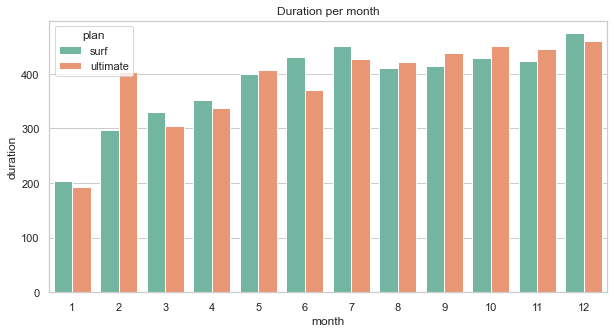

In [108]:
plt.figure(figsize=(10, 5))
fig = df.pivot_table(index='plan', columns='month', values='duration')
fig = fig.stack().reset_index()
fig.columns = ['plan', 'month', 'duration']
sns.barplot(data=fig, x='month', y='duration', hue='plan')
plt.title('Duration per month');

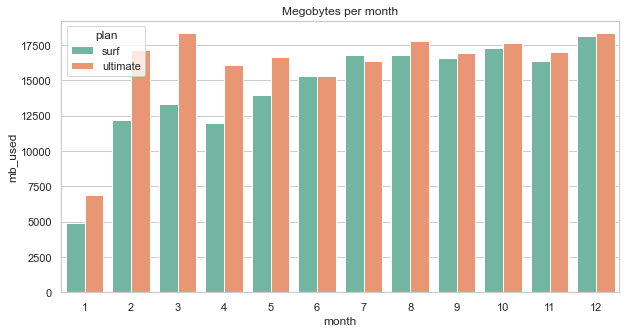

In [110]:
plt.figure(figsize=(10, 5))
fig = df.pivot_table(index='plan', columns='month', values='mb_used')
fig = fig.stack().reset_index()
fig.columns = ['plan', 'month', 'mb_used']
sns.barplot(data=fig, x='month', y='mb_used', hue='plan')
plt.title('Megobytes per month');

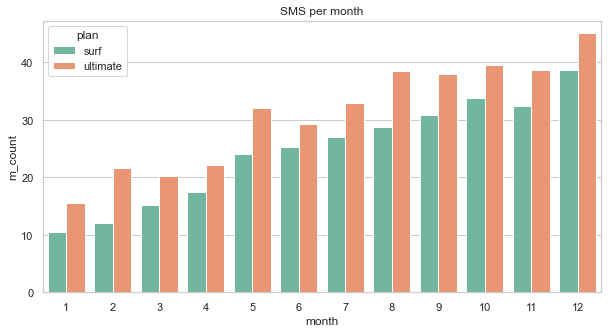

In [112]:
plt.figure(figsize=(10, 5))
fig = df.pivot_table(index='plan', columns='month', values='m_count')
fig = fig.stack().reset_index()
fig.columns = ['plan', 'month', 'm_count']
sns.barplot(data=fig, x='month', y='m_count', hue='plan')
plt.title('SMS per month');

from month to month users use more and more. the two tariffs look about the same. First months looks strange. I check it later.

In [19]:
df[['duration', 'mb_used', 'm_count']].describe()

,duration,mb_used,m_count
count,2293.000000,2293.000000,2293.000000
mean,429.283471,16764.397606,33.166594
std,236.320077,7967.237527,34.070085
min,0.000000,0.000000,0.000000
25%,265.000000,12235.760000,3.000000
50%,425.000000,16830.640000,26.000000
75%,572.000000,20999.840000,51.000000
max,1510.000000,70931.590000,266.000000


a very large scatter of data among SMS. The difference is almost twofold.

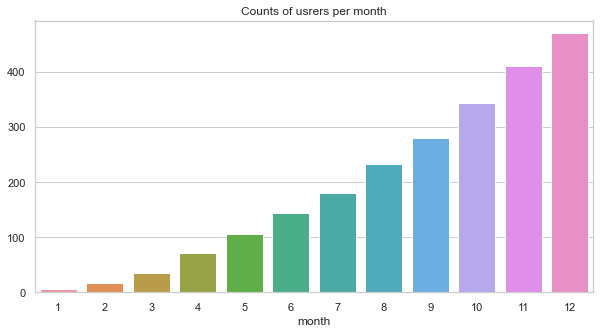

In [127]:
fig = df.groupby('month')['month'].count()
fig.values
plt.figure(figsize=(10, 5))
sns.barplot(x=fig.index, y=fig.values)
plt.title('Counts of usrers per month');

as I thought there is a problem with the first months. There is a very big difference in the number of users in 1 and 12 months.

### Conclusion step 3
In this step i found that in first months not enough data to make conclusion. I think we need to take only from 8 month. on both tariffs users spent more than 400 minuts per month and more than 15GB also per month. The users of the Ultimate tariff use SMS more. I think people wich take Ultimate plan do it mostly for use internet.

## Step 4. Test the hypotheses
<b>Null hypothesis</b> - The average profit from users of Ultimate and Surf calling plans the same.<br>
<b>Alternative hypotheses</b> - The average profit from users of Ultimate and Surf calling plans differs.

In [130]:
alpha = .05
results = st.ttest_ind(df.loc[(df['plan'] == 'surf') & (df['month'] > 7)]['monthly_pay'],
                       df.loc[(df['plan'] == 'ultimate') & (df['month'] > 7)]['monthly_pay'], equal_var=False)
# test the hypothesis that the means of the two independent populations are equal

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  5.284017374145173e-07
We reject the null hypothesis


alternative hypotheses is right. The average profit from users of Ultimate and Surf calling plans differs.

In [131]:
if df.loc[(df['plan'] == 'surf') & (df['month'] > 7)]['monthly_pay'].mean() < df.loc[(df['plan'] == 'ultimate') & (df['month'] > 7)]['monthly_pay'].mean():
    print('Ultimate plan give more money')
else:
    print('Surf plan give more money')

Ultimate plan give more money


<b>Null hypothesis</b> - The average profit from users in NY-NJ area the same from that of the users from other regions.<br>
<b>Alternative hypotheses</b> - The average profit from users in NY-NJ area is different from that of the users from other regions.

In [132]:
results = st.ttest_ind(df.loc[(df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA') & (df['month'] > 7)]['monthly_pay'], 
                       df.loc[(df['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA') & (df['month'] > 7)]['monthly_pay'], 
                       equal_var = False)
# test the hypothesis that the means of the two independent populations are equal

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.370096070779497
We can't reject the null hypothesis


null hypothesis is right. The average profit from users in NY-NJ area isn't different from that of the users from other regions.

### Conclusion step 4
I used Students t-test becouse is the most commonly applied when the test statistic would follow a normal distribution. In first test We reject the null hypothesis. It's mean that alternative hypotheses is right and the average profit from users of Ultimate and Surf calling plans differs. In second test We can't reject the null hypothesis. it's mean that users in NY-NJ spent as much money as users from other regions.

## Step 5. Overall conclusion
In data was users withoun one or more information. not a lot. With all the information I was able to calculate how much each user pays per month to the operator. But in first month not enought users to make conclusion. I was use information after 7 month. Minutes and internet users use about the same, but sms send more users in Ultimate plan. Test of differs of average profit show that it is not same. Users on ultimete plan spent more money. Maybe need more order to adjust the advertising budget for ultimate plans. advertising need in all region, not more in NY.